In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import levene
from statsmodels.stats.diagnostic import het_breuschpagan

C:\Users\tilleymusprime\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\fdf_clean.csv')

In [5]:
#In this workbook, we will exmine the left tackle position
lt = df[df['Position'] == 'LT']
ltcorr = lt.corr()
ltpos = ltcorr[ltcorr['Overall Rating'] >= 0.5]
ltneg = ltcorr[ltcorr['Overall Rating'] <= -0.5]
print(ltpos['Overall Rating'], ltneg['Overall Rating'])
#These are the significant variables.  We will remove the one with the highest VIF score until they are all below 5

Overall Rating          1.000000
Awareness               0.898399
Impact Blocking         0.794862
Pass Block              0.847514
Run Block               0.671931
Stamina                 0.510760
Strength                0.675130
4AVG Speed              0.519280
4AVG Agility            0.532429
4AVG Awareness          0.680349
3AVG Awareness          0.566379
4AVG Run Block          0.542146
4AVG Pass Block         0.585915
4Avg Elusiveness        0.509825
4Average Toughness      0.519701
4AVG Stamina            0.515168
4AVG Press              0.505982
4AVG Pursuit            0.509580
4AVG Impact Blocking    0.562030
4AVG Overall Rating     0.635857
Name: Overall Rating, dtype: float64 Series([], Name: Overall Rating, dtype: float64)


In [6]:
ltsig = lt[['Awareness', 'Impact Blocking', 'Pass Block', 'Run Block', 'Stamina', 'Strength', '4AVG Speed', '4AVG Agility',
           '4AVG Awareness', '3AVG Awareness', '4AVG Run Block', '4AVG Pass Block', '4Avg Elusiveness', '4Average Toughness',
           '4AVG Stamina', '4AVG Press', '4AVG Pursuit', '4AVG Impact Blocking', '4AVG Overall Rating']]
X = add_constant(ltsig)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#The first variable we will remove is 4avg overall rating

const                   1762.833185
Awareness                  8.535063
Impact Blocking            7.923026
Pass Block                 5.094798
Run Block                  3.669580
Stamina                    6.390133
Strength                   2.560388
4AVG Speed                44.068861
4AVG Agility              55.834025
4AVG Awareness           182.922074
3AVG Awareness            17.434295
4AVG Run Block           220.580274
4AVG Pass Block          273.639790
4Avg Elusiveness           3.873435
4Average Toughness        38.139795
4AVG Stamina             296.161279
4AVG Press                11.743895
4AVG Pursuit               4.820426
4AVG Impact Blocking     301.561669
4AVG Overall Rating      893.137466
dtype: float64

In [7]:
ltsig1 = lt[['Awareness', 'Impact Blocking', 'Pass Block', 'Run Block', 'Stamina', 'Strength', '4AVG Speed', '4AVG Agility',
           '4AVG Awareness', '3AVG Awareness', '4AVG Run Block', '4AVG Pass Block', '4Avg Elusiveness', '4Average Toughness',
           '4AVG Stamina', '4AVG Press', '4AVG Pursuit', '4AVG Impact Blocking']]
X = add_constant(ltsig1)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Next we will remove 4avg impact blocking

const                   842.766951
Awareness                 8.015514
Impact Blocking           7.882333
Pass Block                4.842004
Run Block                 3.666444
Stamina                   5.308737
Strength                  2.106578
4AVG Speed               43.379391
4AVG Agility             54.961633
4AVG Awareness           76.324444
3AVG Awareness           17.217317
4AVG Run Block          155.620409
4AVG Pass Block         179.033005
4Avg Elusiveness          3.872018
4Average Toughness       36.127395
4AVG Stamina            255.771114
4AVG Press                9.413419
4AVG Pursuit              4.701485
4AVG Impact Blocking    295.018436
dtype: float64

In [8]:
ltsig2 = lt[['Awareness', 'Impact Blocking', 'Pass Block', 'Run Block', 'Stamina', 'Strength', '4AVG Speed', '4AVG Agility',
           '4AVG Awareness', '3AVG Awareness', '4AVG Run Block', '4AVG Pass Block', '4Avg Elusiveness', '4Average Toughness',
           '4AVG Stamina', '4AVG Press', '4AVG Pursuit']]
X = add_constant(ltsig2)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Next we will remove4AVG Stamina

const                 780.594100
Awareness               7.816531
Impact Blocking         3.069083
Pass Block              4.519203
Run Block               3.407409
Stamina                 4.997743
Strength                2.017070
4AVG Speed             43.335329
4AVG Agility           54.101451
4AVG Awareness         75.737768
3AVG Awareness         16.959377
4AVG Run Block        135.265851
4AVG Pass Block       163.273064
4Avg Elusiveness        3.699817
4Average Toughness     33.132396
4AVG Stamina          236.318253
4AVG Press              9.075059
4AVG Pursuit            4.693673
dtype: float64

In [11]:
ltsig3 = lt[['Awareness', 'Impact Blocking', 'Pass Block', 'Run Block', 'Stamina', 'Strength', '4AVG Speed', '4AVG Agility',
           '4AVG Awareness', '3AVG Awareness', '4AVG Run Block', '4AVG Pass Block', '4Avg Elusiveness', '4Average Toughness',
           '4AVG Press', '4AVG Pursuit']]
X = add_constant(ltsig3)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Net removing 4AVg Pass Block

const                 774.022813
Awareness               7.816321
Impact Blocking         3.055632
Pass Block              3.614874
Run Block               3.106574
Stamina                 2.168970
Strength                1.963040
4AVG Speed             42.172389
4AVG Agility           50.165399
4AVG Awareness         74.732199
3AVG Awareness         15.342895
4AVG Run Block        117.996356
4AVG Pass Block       140.618870
4Avg Elusiveness        3.671940
4Average Toughness     25.912667
4AVG Press              7.639107
4AVG Pursuit            4.688280
dtype: float64

In [12]:
ltsig4 = lt[['Awareness', 'Impact Blocking', 'Pass Block', 'Run Block', 'Stamina', 'Strength', '4AVG Speed', '4AVG Agility',
           '4AVG Awareness', '3AVG Awareness', '4AVG Run Block', '4Avg Elusiveness', '4Average Toughness',
           '4AVG Press', '4AVG Pursuit']]
X = add_constant(ltsig4)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Next removing 4avg awareness

const                 771.047727
Awareness               7.323631
Impact Blocking         3.013227
Pass Block              2.135007
Run Block               2.623899
Stamina                 2.053623
Strength                1.962869
4AVG Speed             42.171122
4AVG Agility           47.379200
4AVG Awareness         63.927872
3AVG Awareness         15.221408
4AVG Run Block         76.549971
4Avg Elusiveness        3.659198
4Average Toughness     25.344672
4AVG Press              7.636237
4AVG Pursuit            4.662400
dtype: float64

In [13]:
ltsig5 = lt[['Awareness', 'Impact Blocking', 'Pass Block', 'Run Block', 'Stamina', 'Strength', '4AVG Speed', '4AVG Agility',
           '3AVG Awareness', '4AVG Run Block', '4Avg Elusiveness', '4Average Toughness', '4AVG Press', '4AVG Pursuit']]
X = add_constant(ltsig5)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Next we ill remove 4avg agility

const                 723.497992
Awareness               3.592136
Impact Blocking         2.947646
Pass Block              2.033232
Run Block               2.499038
Stamina                 2.039516
Strength                1.945937
4AVG Speed             41.211718
4AVG Agility           47.349154
3AVG Awareness         12.805792
4AVG Run Block         47.453094
4Avg Elusiveness        3.473401
4Average Toughness     25.195876
4AVG Press              7.591072
4AVG Pursuit            4.658033
dtype: float64

In [14]:
ltsig6 = lt[['Awareness', 'Impact Blocking', 'Pass Block', 'Run Block', 'Stamina', 'Strength', '4AVG Speed',
           '3AVG Awareness', '4AVG Run Block', '4Avg Elusiveness', '4Average Toughness', '4AVG Press', '4AVG Pursuit']]
X = add_constant(ltsig6)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Next we will remove 4avg speed

const                 706.120318
Awareness               3.401555
Impact Blocking         2.943932
Pass Block              2.031093
Run Block               2.291946
Stamina                 2.029411
Strength                1.943759
4AVG Speed             28.227878
3AVG Awareness         12.621557
4AVG Run Block         42.124910
4Avg Elusiveness        3.387457
4Average Toughness     24.700778
4AVG Press              7.569544
4AVG Pursuit            4.636210
dtype: float64

In [15]:
ltsig7 = lt[['Awareness', 'Impact Blocking', 'Pass Block', 'Run Block', 'Stamina', 'Strength',
           '3AVG Awareness', '4AVG Run Block', '4Avg Elusiveness', '4Average Toughness', '4AVG Press', '4AVG Pursuit']]
X = add_constant(ltsig7)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Next we will remove the 4avg run block variable

const                 701.886642
Awareness               3.357436
Impact Blocking         2.943299
Pass Block              2.027312
Run Block               2.268672
Stamina                 2.021090
Strength                1.941752
3AVG Awareness         11.947457
4AVG Run Block         32.869066
4Avg Elusiveness        3.382899
4Average Toughness     23.377774
4AVG Press              7.542855
4AVG Pursuit            4.594416
dtype: float64

In [17]:
ltsig8 = lt[['Awareness', 'Impact Blocking', 'Pass Block', 'Run Block', 'Stamina', 'Strength',
           '3AVG Awareness', '4Avg Elusiveness', '4Average Toughness', '4AVG Press', '4AVG Pursuit']]
X = add_constant(ltsig8)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Next we will remove 4average toughness

const                 700.768696
Awareness               3.345491
Impact Blocking         2.935596
Pass Block              2.015739
Run Block               2.089478
Stamina                 1.827657
Strength                1.940196
3AVG Awareness          9.357155
4Avg Elusiveness        3.319090
4Average Toughness     11.238545
4AVG Press              6.804165
4AVG Pursuit            4.454441
dtype: float64

In [18]:
ltsig9 = lt[['Awareness', 'Impact Blocking', 'Pass Block', 'Run Block', 'Stamina', 'Strength',
           '3AVG Awareness', '4Avg Elusiveness', '4AVG Press', '4AVG Pursuit']]
X = add_constant(ltsig9)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Next we will remove 4avg press

const               699.152059
Awareness             3.340164
Impact Blocking       2.859450
Pass Block            2.002263
Run Block             2.064243
Stamina               1.800568
Strength              1.916029
3AVG Awareness        5.435770
4Avg Elusiveness      3.224716
4AVG Press            6.040530
4AVG Pursuit          4.378561
dtype: float64

In [19]:
ltsig10 = lt[['Awareness', 'Impact Blocking', 'Pass Block', 'Run Block', 'Stamina', 'Strength',
           '3AVG Awareness', '4Avg Elusiveness', '4AVG Pursuit']]
X = add_constant(ltsig10)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Now that all of our vif scores are below 5, we can move onto to the summary statistic tests

const               695.501084
Awareness             3.340137
Impact Blocking       2.830496
Pass Block            2.002058
Run Block             2.045657
Stamina               1.769317
Strength              1.911416
3AVG Awareness        3.672187
4Avg Elusiveness      3.082207
4AVG Pursuit          3.706023
dtype: float64

In [20]:
LT = sm.OLS(lt['Overall Rating'], ltsig10).fit()
print(LT.summary())
#It looks like we have a few variables that are not significant
#We will start with removing 4AVG Elusiveness and keep removing until all p-values are below 0.005

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.328e+04
Date:                Wed, 18 Jul 2018   Prob (F-statistic):          1.21e-162
Time:                        16:10:38   Log-Likelihood:                -262.86
No. Observations:                 119   AIC:                             543.7
Df Residuals:                     110   BIC:                             568.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Awareness            0.2977      0.020  

In [21]:
ltsig11 = lt[['Awareness', 'Impact Blocking', 'Pass Block', 'Run Block', 'Stamina', 'Strength',
           '3AVG Awareness', '4AVG Pursuit']]
LT1 = sm.OLS(lt['Overall Rating'], ltsig11).fit()
print(LT1.summary())
#It looks like the next variable we will remove is going to be 4AVG Pursuit

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.507e+04
Date:                Wed, 18 Jul 2018   Prob (F-statistic):          9.64e-165
Time:                        16:10:41   Log-Likelihood:                -262.87
No. Observations:                 119   AIC:                             541.7
Df Residuals:                     111   BIC:                             564.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Awareness           0.2980      0.020     

In [22]:
ltsig12 = lt[['Awareness', 'Impact Blocking', 'Pass Block', 'Run Block', 'Stamina', 'Strength',
           '3AVG Awareness']]
LT2 = sm.OLS(lt['Overall Rating'], ltsig12).fit()
print(LT2.summary())
#Next, we will remove Strength

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.736e+04
Date:                Wed, 18 Jul 2018   Prob (F-statistic):          7.56e-167
Time:                        16:10:42   Log-Likelihood:                -262.95
No. Observations:                 119   AIC:                             539.9
Df Residuals:                     112   BIC:                             559.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Awareness           0.2979      0.020     

In [23]:
ltsig13 = lt[['Awareness', 'Impact Blocking', 'Pass Block', 'Run Block', 'Stamina',
           '3AVG Awareness']]
LT3 = sm.OLS(lt['Overall Rating'], ltsig13).fit()
print(LT3.summary())
#It looks like all of the variables are significant

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.033e+04
Date:                Wed, 18 Jul 2018   Prob (F-statistic):          6.62e-169
Time:                        16:10:44   Log-Likelihood:                -263.23
No. Observations:                 119   AIC:                             538.5
Df Residuals:                     113   BIC:                             555.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Awareness           0.2960      0.020     

In [24]:
def model():
    pv=0.296*lt['Awareness']+0.15*lt['Impact Blocking']+0.4728*lt['Pass Block']+0.1083*lt['Run Block']-0.0964*lt['Stamina']+0.0433*lt['3AVG Awareness']
    return pv

In [25]:
#Let's set up the Predicted value and Residual columns
lt['Predicted Values'] = model()
lt['Residuals'] = lt['Predicted Values'] - lt['Overall Rating']

C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


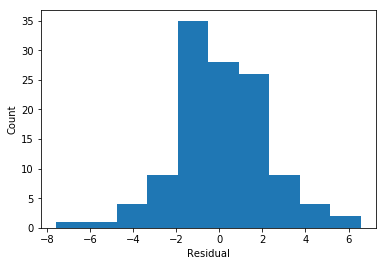

In [26]:
plt.hist(lt['Residuals'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

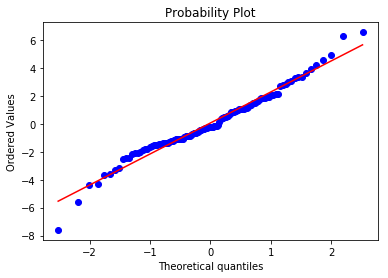

In [27]:
stats.probplot(lt['Residuals'], plot=plt)
plt.show()
#The residuals appear to be normally distributed except for one residual

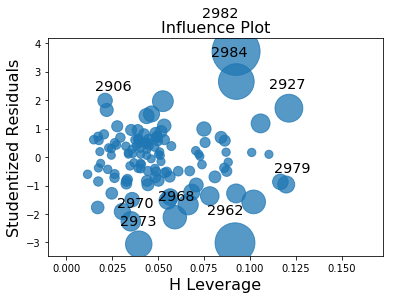

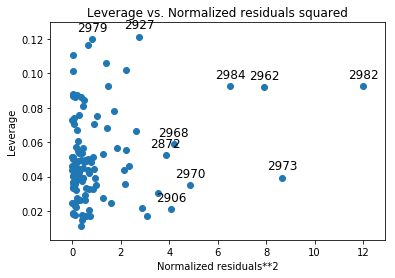

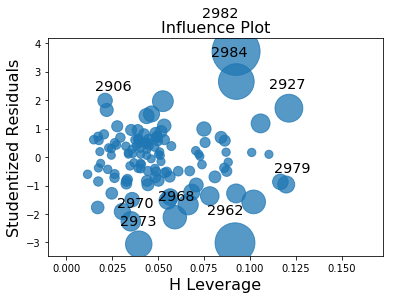

In [28]:
#Next we will check for influence and leverage points
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(LT3)
influence_plot(LT3)
#It looks like there is a high influence point with a high residual that has a lot of leverage in the model (2982)
#We will remove that data point and retest the model

In [29]:
ltunleveraged1 = lt.drop(df.index[[2982, 2984]])
ltunleveraged1.shape

(117, 173)

In [30]:
lt.shape
#It looks like we successfully dropped the two points

(119, 173)

In [31]:
print(LT3.summary())

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.033e+04
Date:                Wed, 18 Jul 2018   Prob (F-statistic):          6.62e-169
Time:                        16:11:15   Log-Likelihood:                -263.23
No. Observations:                 119   AIC:                             538.5
Df Residuals:                     113   BIC:                             555.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Awareness           0.2960      0.020     

In [32]:
ltclean = ltunleveraged1[['Overall Rating','Awareness', 'Impact Blocking', 'Pass Block', 'Run Block', 'Stamina',
           '3AVG Awareness']]
ltcleansig = ltunleveraged1[['Awareness', 'Impact Blocking', 'Pass Block', 'Run Block', 'Stamina',
           '3AVG Awareness']]
LT4 = sm.OLS(ltclean['Overall Rating'], ltcleansig).fit()
print(LT4.summary())
#It looks like removing the leverage points reduced the AIC by 31 points so it improved the model
#Unfortunately, it did add some negative skew to the model but not a significant amount
#We might have intorduced a little bit of autocorrelation too judgin by the increase in the Durbin Watson statistic

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.387e+04
Date:                Wed, 18 Jul 2018   Prob (F-statistic):          3.51e-170
Time:                        16:11:17   Log-Likelihood:                -247.86
No. Observations:                 117   AIC:                             507.7
Df Residuals:                     111   BIC:                             524.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Awareness           0.2689      0.019     

In [33]:
def model():
    pv=0.2689*lt['Awareness']+0.1663*lt['Impact Blocking']+0.4947*lt['Pass Block']+0.0805*lt['Run Block']-0.0927*lt['Stamina']+0.0566*lt['3AVG Awareness']
    return pv

In [34]:
ltclean['Predicted Values'] = model()
ltclean['Residuals'] = lt['Predicted Values'] - lt['Overall Rating']

C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


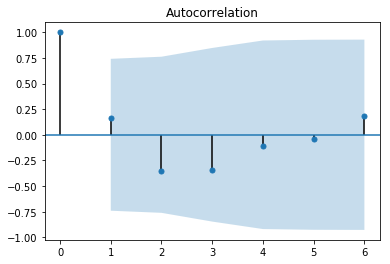

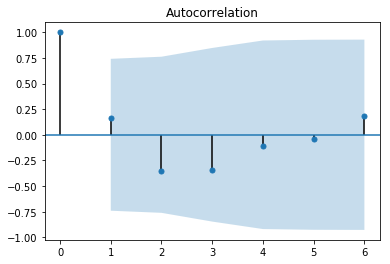

In [35]:
ltsigcorr= ltclean[['Awareness', 'Impact Blocking', 'Pass Block', 'Run Block', 'Stamina',
           '3AVG Awareness', 'Overall Rating']].corr()
plot_acf(ltsigcorr['Overall Rating'])
#There does not appear to be any autocorrelation

In [37]:
#Finally, we move on to the Breusch Pagan test to check for heteroskedasticity
het_breuschpagan(ltclean['Residuals'], ltcleansig)
#Based on the extremely low p-values, we can reject the null that there is heteroskedasticity present in the model

(42.426428021569635,
 4.828635673565702e-08,
 10.525027802423883,
 3.167583676872567e-09)

In [39]:
#Finally, let's test our new model and see how it did
#Now that we have determined that we can use linear regression, let's run some tests and see how accuract our linear 
#regression model is
X_train, X_test, y_train, y_test = train_test_split(ltcleansig, ltclean['Overall Rating'], test_size = 0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
ltcv = cross_val_score(reg, ltcleansig, ltclean['Overall Rating'], cv=5)
ltcv_mean = np.mean(ltcv)
print(ltcv, ltcv_mean)
#It looks like on average this model explained 94% in the variation in the data
#It looks like the original was slightly more accuracte

[0.9831477  0.983677   0.98040659 0.95852399 0.79626224] 0.9404035030365172


In [40]:
#Let's see how that stacks up against our first model
X_train, X_test, y_train, y_test = train_test_split(ltsig13, lt['Overall Rating'], test_size = 0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
ltcv = cross_val_score(reg, ltsig13, lt['Overall Rating'], cv=5)
ltcv_mean = np.mean(ltcv)
print(ltcv, ltcv_mean)

[0.98287901 0.98303504 0.98272509 0.91242728 0.89834402] 0.9518820857587261


In [53]:
ltdesc = ltclean.describe()
ltdesc.to_csv('C:\\Users\\tilleymusprime\\Desktop\\ltdesc.csv')